# Importing Libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the data into a pandas DataFrame
data = pd.read_excel(r"C:\Users\Divya\OneDrive\Desktop\Book Recommend.xlsx")

# Data Preprocessing

The dataset is sourced from Kaggle and comprises 22,003 rows and 20 columns. Each row represents a unique book entry, while the columns encompass various attributes and metadata associated with each book. These attributes include the book's ID, title, link, series affiliation, author details, rating count, review count, average rating, counts of five-star to one-star ratings, number of pages, publisher information, genre and votes, any awards received, and the number of books in the series if applicable. This comprehensive dataset offers a rich resource for analyzing and exploring trends, patterns, and characteristics within the realm of literature and book recommendations.

In [40]:
data

,id,title,link,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,publisher,genre_and_votes,awards,books_in_series,genre_dict,genres
0,630104,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,92,220.0,Simon Schuster Books for Young Readers,"Young Adult 161, Mystery 45, Romance 32",NaN,"381489, 381501, 352428, 630103, 1783281, 17832...","{'Young Adult': 161, 'Mystery': 45, 'Romance':...","[Young Adult, Mystery, Romance]"
1,9487,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),Karen Kingsbury,4179,177,4.35,2255,1290,518,93,23,400.0,Thomas Nelson,"Christian Fiction 114, Christian 45, Fiction 3...",NaN,115036,"{'Christian Fiction': 114, 'Christian': 45, 'F...","[Christian Fiction, Christian, Fiction, Romance]"
2,6050894,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,44,320.0,Zondervan,"Christian Fiction 174, Christian 81, Fiction 58",NaN,"4010795, 40792877, 7306261","{'Christian Fiction': 174, 'Christian': 81, 'F...","[Christian Fiction, Christian, Fiction]"
3,39030,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,324,464.0,Tor Books,"Thriller 626, Mystery 493, Horror 432, Fiction...",NaN,"67035, 39031, 39033, 136637, 136638, 30068, 39...","{'Thriller': 626, 'Mystery': 493, 'Horror': 43...","[Thriller, Mystery, Horror, Fiction]"
4,998,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,1086,258.0,Gallery Books,"Economics-Finance 1162, Nonfiction 910, Busine...",Independent Publisher Book Award (IPPY) Nomine...,NaN,"{'Economics-Finance': 1162, 'Nonfiction': 910,...","[Economics-Finance, Nonfiction, Business, Fina..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28172,131338,The White Lotus,https://www.goodreads.com//book/show/131338.Th...,NaN,"Osho, Ma Prem Asha",96,11,4.08,37,39,14,3,3,430.0,Osho International Foundation,"Philosophy 2, Buddhism-Zen 2, Nonfiction 2",NaN,NaN,"{'Philosophy': 2, 'Buddhism-Zen': 2, 'Nonficti...","[Philosophy, Buddhism-Zen, Nonfiction]"
28173,17884045,The Planetary Omnibus,https://www.goodreads.com//book/show/17884045-...,(Planetary #1-4),"Warren Ellis, John Cassaday",2022,237,4.52,1299,522,157,37,7,864.0,DC Comics,"Sequential Art-Comics 164, Sequential Art-Grap...",NaN,"209966, 209968, 43743, 5210326, 294884","{'Sequential Art-Comics': 164, 'Sequential Art...","[Sequential Art-Comics, Sequential Art-Graphic..."
28174,100480,Trouble with Trolls,https://www.goodreads.com//book/show/100480.Tr...,(Treva & the Trolls #1),Jan Brett,3094,157,4.13,1338,1017,586,113,40,32.0,Puffin Books,"Childrens-Picture Books 169, Childrens 75, Hol...",Maryland Black-Eyed Susan Book Award for Pictu...,1008587,"{'Childrens-Picture Books': 169, 'Childrens': ...","[Childrens-Picture Books, Childrens, Holiday-C..."
28175,13456414,A Short Stay in Hell,https://www.goodreads.com//book/show/13456414-...,NaN,Steven L. Peck,2341,519,4.20,1023,894,319,90,15,104.0,Strange Violin Editions,"Fiction 116, Fantasy 56, Horror 31, Religion 2...",NaN,NaN,"{'Fiction': 116, 'Fantasy': 56, 'Horror': 31, ...","[Fiction, Fantasy, Horror, Religion, Philosoph..."


In [21]:
missing_values = data.isnull().sum()

# Print the count of missing values in each column
print(missing_values)

id                        0
title                     0
link                      0
series                16701
author                    0
rating_count              0
review_count              0
average_rating            0
five_star_ratings         0
four_star_ratings         0
three_star_ratings        0
two_star_ratings          0
one_star_ratings          0
number_of_pages        1510
publisher              2260
genre_and_votes        2201
awards                23605
books_in_series       17504
dtype: int64


In [22]:
data.dropna(subset=['genre_and_votes'], inplace = True)

In [23]:
# Confirm there are no more missing values in the dataset
data.isnull().sum()

id                        0
title                     0
link                      0
series                14733
author                    0
rating_count              0
review_count              0
average_rating            0
five_star_ratings         0
four_star_ratings         0
three_star_ratings        0
two_star_ratings          0
one_star_ratings          0
number_of_pages        1160
publisher              1807
genre_and_votes           0
awards                21433
books_in_series       15402
dtype: int64

# Data Analysis and Visualization

This section performs data analysis and visualization to understand the distribution and characteristics of the data. It includes calculating summary statistics and creating visualizations.

In [24]:
# Calculate summary statistics for book ratings
ratings_summary = data['rating_count'].describe()

# Calculate additional statistics
median = data['rating_count'].median()
std_dev = data['rating_count'].std()

print("Summary Statistics for review_count:")
print(ratings_summary)


Summary Statistics for review_count:
count    2.597600e+04
mean     6.931141e+03
std      6.748229e+04
min      0.000000e+00
25%      3.300000e+02
50%      1.733000e+03
75%      5.577000e+03
max      6.801077e+06
Name: rating_count, dtype: float64


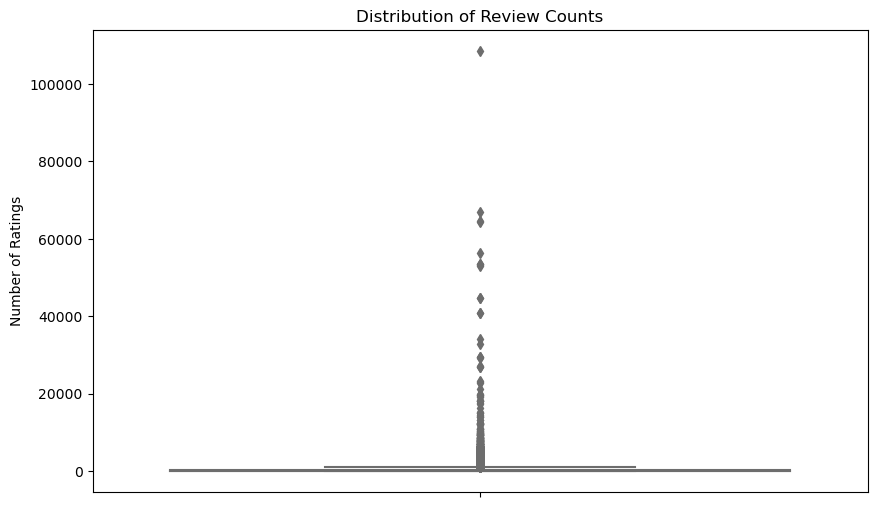

In [25]:
# Create a box plot to visualize the distribution of review counts
import seaborn as sns

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a box plot of review counts
sns.boxplot(data=data, y='review_count', color='salmon')

# Add labels and title
plt.ylabel('Number of Ratings')
plt.title('Distribution of Review Counts')

# Show the plot
plt.show()

In [26]:
# We need to filter books with review count greater than 100,000 to focus on popular books
reviews_greater_than_100000 = data[data['review_count'] > 100000]


total_review_count_greater_than_100000 = reviews_greater_than_100000['review_count'].count()
total_review_count_greater_than_100000



1

In [27]:
data.drop(12665, inplace = True)
data

,id,title,link,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,publisher,genre_and_votes,awards,books_in_series
0,630104,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,92,220.0,Simon Schuster Books for Young Readers,"Young Adult 161, Mystery 45, Romance 32",NaN,"381489, 381501, 352428, 630103, 1783281, 17832..."
1,9487,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),Karen Kingsbury,4179,177,4.35,2255,1290,518,93,23,400.0,Thomas Nelson,"Christian Fiction 114, Christian 45, Fiction 3...",NaN,115036
2,6050894,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,44,320.0,Zondervan,"Christian Fiction 174, Christian 81, Fiction 58",NaN,"4010795, 40792877, 7306261"
3,39030,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,324,464.0,Tor Books,"Thriller 626, Mystery 493, Horror 432, Fiction...",NaN,"67035, 39031, 39033, 136637, 136638, 30068, 39..."
4,998,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,1086,258.0,Gallery Books,"Economics-Finance 1162, Nonfiction 910, Busine...",Independent Publisher Book Award (IPPY) Nomine...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28172,131338,The White Lotus,https://www.goodreads.com//book/show/131338.Th...,NaN,"Osho, Ma Prem Asha",96,11,4.08,37,39,14,3,3,430.0,Osho International Foundation,"Philosophy 2, Buddhism-Zen 2, Nonfiction 2",NaN,NaN
28173,17884045,The Planetary Omnibus,https://www.goodreads.com//book/show/17884045-...,(Planetary #1-4),"Warren Ellis, John Cassaday",2022,237,4.52,1299,522,157,37,7,864.0,DC Comics,"Sequential Art-Comics 164, Sequential Art-Grap...",NaN,"209966, 209968, 43743, 5210326, 294884"
28174,100480,Trouble with Trolls,https://www.goodreads.com//book/show/100480.Tr...,(Treva & the Trolls #1),Jan Brett,3094,157,4.13,1338,1017,586,113,40,32.0,Puffin Books,"Childrens-Picture Books 169, Childrens 75, Hol...",Maryland Black-Eyed Susan Book Award for Pictu...,1008587
28175,13456414,A Short Stay in Hell,https://www.goodreads.com//book/show/13456414-...,NaN,Steven L. Peck,2341,519,4.20,1023,894,319,90,15,104.0,Strange Violin Editions,"Fiction 116, Fantasy 56, Horror 31, Religion 2...",NaN,NaN


In [28]:
# We need to filter review count less than or equal to 10 to identify less popular books
reviews_less_than_100 = data[data['review_count'] <= 10]


total_review_count_less_than_100 = reviews_less_than_100['review_count'].count()
total_review_count_less_than_100

3310

In [29]:
data = data[data['review_count'] > 10]
data

,id,title,link,series,author,rating_count,review_count,average_rating,five_star_ratings,four_star_ratings,three_star_ratings,two_star_ratings,one_star_ratings,number_of_pages,publisher,genre_and_votes,awards,books_in_series
0,630104,Inner Circle,https://www.goodreads.com//book/show/630104.In...,(Private #5),"Kate Brian, Julian Peploe",7597,196,4.03,3045,2323,1748,389,92,220.0,Simon Schuster Books for Young Readers,"Young Adult 161, Mystery 45, Romance 32",NaN,"381489, 381501, 352428, 630103, 1783281, 17832..."
1,9487,A Time to Embrace,https://www.goodreads.com//book/show/9487.A_Ti...,(Timeless Love #2),Karen Kingsbury,4179,177,4.35,2255,1290,518,93,23,400.0,Thomas Nelson,"Christian Fiction 114, Christian 45, Fiction 3...",NaN,115036
2,6050894,Take Two,https://www.goodreads.com//book/show/6050894-t...,(Above the Line #2),Karen Kingsbury,6288,218,4.23,3000,2020,1041,183,44,320.0,Zondervan,"Christian Fiction 174, Christian 81, Fiction 58",NaN,"4010795, 40792877, 7306261"
3,39030,Reliquary,https://www.goodreads.com//book/show/39030.Rel...,(Pendergast #2),"Douglas Preston, Lincoln Child",38382,1424,4.01,12711,15407,8511,1429,324,464.0,Tor Books,"Thriller 626, Mystery 493, Horror 432, Fiction...",NaN,"67035, 39031, 39033, 136637, 136638, 30068, 39..."
4,998,The Millionaire Next Door: The Surprising Secr...,https://www.goodreads.com//book/show/998.The_M...,NaN,"Thomas J. Stanley, William D. Danko",72168,3217,4.04,27594,25219,14855,3414,1086,258.0,Gallery Books,"Economics-Finance 1162, Nonfiction 910, Busine...",Independent Publisher Book Award (IPPY) Nomine...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28172,131338,The White Lotus,https://www.goodreads.com//book/show/131338.Th...,NaN,"Osho, Ma Prem Asha",96,11,4.08,37,39,14,3,3,430.0,Osho International Foundation,"Philosophy 2, Buddhism-Zen 2, Nonfiction 2",NaN,NaN
28173,17884045,The Planetary Omnibus,https://www.goodreads.com//book/show/17884045-...,(Planetary #1-4),"Warren Ellis, John Cassaday",2022,237,4.52,1299,522,157,37,7,864.0,DC Comics,"Sequential Art-Comics 164, Sequential Art-Grap...",NaN,"209966, 209968, 43743, 5210326, 294884"
28174,100480,Trouble with Trolls,https://www.goodreads.com//book/show/100480.Tr...,(Treva & the Trolls #1),Jan Brett,3094,157,4.13,1338,1017,586,113,40,32.0,Puffin Books,"Childrens-Picture Books 169, Childrens 75, Hol...",Maryland Black-Eyed Susan Book Award for Pictu...,1008587
28175,13456414,A Short Stay in Hell,https://www.goodreads.com//book/show/13456414-...,NaN,Steven L. Peck,2341,519,4.20,1023,894,319,90,15,104.0,Strange Violin Editions,"Fiction 116, Fantasy 56, Horror 31, Religion 2...",NaN,NaN


In [30]:
def distplot(figRows,figCols,xSize, ySize, data, features, colors, kde=True, bins=None):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.distplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde, hist_kws={"edgecolor":"k"})
            plot.set_xlabel(features[row][col],fontsize=20)

In [31]:
pal = sns.color_palette(palette='Set1', n_colors=16)

C:\Users\Divya\AppData\Local\Temp\ipykernel_9632\4235626719.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['average_rating'], color='blue', kde=True)


<Axes: xlabel='average_rating', ylabel='Density'>

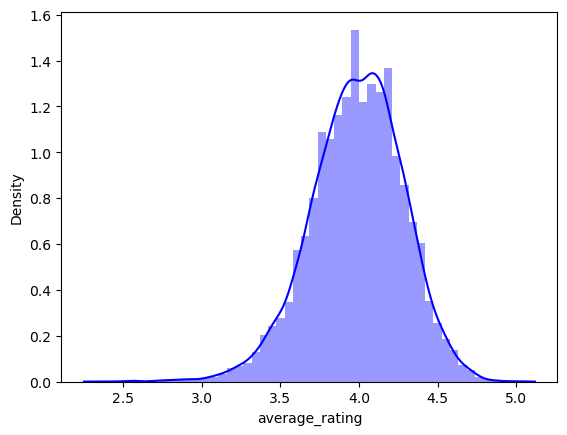

In [32]:
sns.distplot(data['average_rating'], color='blue', kde=True)

In [33]:
train_data, test_data = train_test_split(data, test_size =.30, random_state=10)

print(f'Training set has {train_data.shape[0]} rows and {train_data.shape[1]} columns')
print(f'Testing set has {test_data.shape[0]} rows and {test_data.shape[1]} columns')

Training set has 15865 rows and 18 columns
Testing set has 6800 rows and 18 columns


In [34]:
duplicate_entries = data[data.duplicated(subset=['title'], keep=False)]

# Choose a strategy to handle duplicates (e.g., keep entry with highest rating count)
data.drop_duplicates(subset=['title'], keep='first', inplace=True)

C:\Users\Divya\AppData\Local\Temp\ipykernel_9632\2928498390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(subset=['title'], keep='first', inplace=True)


# Popularity Based Recommender System

In [50]:
class popularity_based_recommender_model():
    def __init__(self, data, test_size=0.2):
        self.data = data
        self.test_size = test_size
        self.train_data = None
        self.test_data = None
        self.popularity_recommendations = None
        self.actual_popular_items = None
        
    def split_data(self):
        # Split dataset into training and testing sets
        self.train_data = self.data.sample(frac=1-self.test_size, random_state=42)
        self.test_data = self.data.drop(self.train_data.index)
        
    def normalize_features(self):
        # Normalize features
        for feature in ['rating_count', 'review_count', 'average_rating']:
            min_value = self.train_data[feature].min()
            max_value = self.train_data[feature].max()
            self.train_data['norm_' + feature] = (self.train_data[feature] - min_value) / (max_value - min_value)
            self.test_data['norm_' + feature] = (self.test_data[feature] - min_value) / (max_value - min_value)
        
    def calculate_popularity_score(self):
        # Calculate popularity score (weighted sum)
        weight_rating_count = 0.4
        weight_review_count = 0.3
        weight_avg_rating = 0.3
        self.train_data['popularity_score'] = (
            weight_rating_count * self.train_data['norm_rating_count'] +
            weight_review_count * self.train_data['norm_review_count'] +
            weight_avg_rating * self.train_data['norm_average_rating']
        )
        self.test_data['popularity_score'] = (
            weight_rating_count * self.test_data['norm_rating_count'] +
            weight_review_count * self.test_data['norm_review_count'] +
            weight_avg_rating * self.test_data['norm_average_rating']
        )
        
    def rank_books(self):
        # Rank books by popularity score
        self.popularity_recommendations = self.train_data.sort_values(by='popularity_score', ascending=False)
        
    def display_top_books(self, n=10):
        # Display top N popular books
        top_books = self.popularity_recommendations.head(n)
        print("Top", n, "Popular Books:")
        print(top_books[['title', 'rating_count', 'review_count', 'average_rating', 'popularity_score']])
        
    def plot_recommendations(self, n=10):
        # Plot recommendations
        plt.figure(figsize=(12, 6))
        top_books = self.popularity_recommendations.head(n)
        sns.barplot(x=top_books['title'], y=top_books['popularity_score'])
        plt.title('Popularity Score of Top Books')
        plt.xlabel('Book Title')
        plt.ylabel('Popularity Score')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


# Create the recommender model
model = popularity_based_recommender_model(data)

# Split the data
model.split_data()

# Normalize features
model.normalize_features()

# Calculate popularity score
model.calculate_popularity_score()

# Rank books
model.rank_books()

# Display top books
model.display_top_books()

Top 10 Popular Books:
                                          title  rating_count  review_count  \
14666                                      1984       3019748         66933   
16503                       Pride and Prejudice       2903267         64424   
18164  Harry Potter and the Prisoner of Azkaban       2702326         53367   
12666       Harry Potter y el cÃƒÂ¡liz de fuego       2507235         44728   
10290                               Animal Farm       2648255         53508   
14657                                 Jane Eyre       1584009         40841   
19529                                    Cinder        655423         53086   
10273                                 Forastera        797330         44692   
14658                        Gone With the Wind       1057416         19432   
21785          Shadowhunters: CittÃƒÂ  di vetro        773274         27204   

       average_rating  popularity_score  
14666            4.18          0.908846  
16503            4.26   

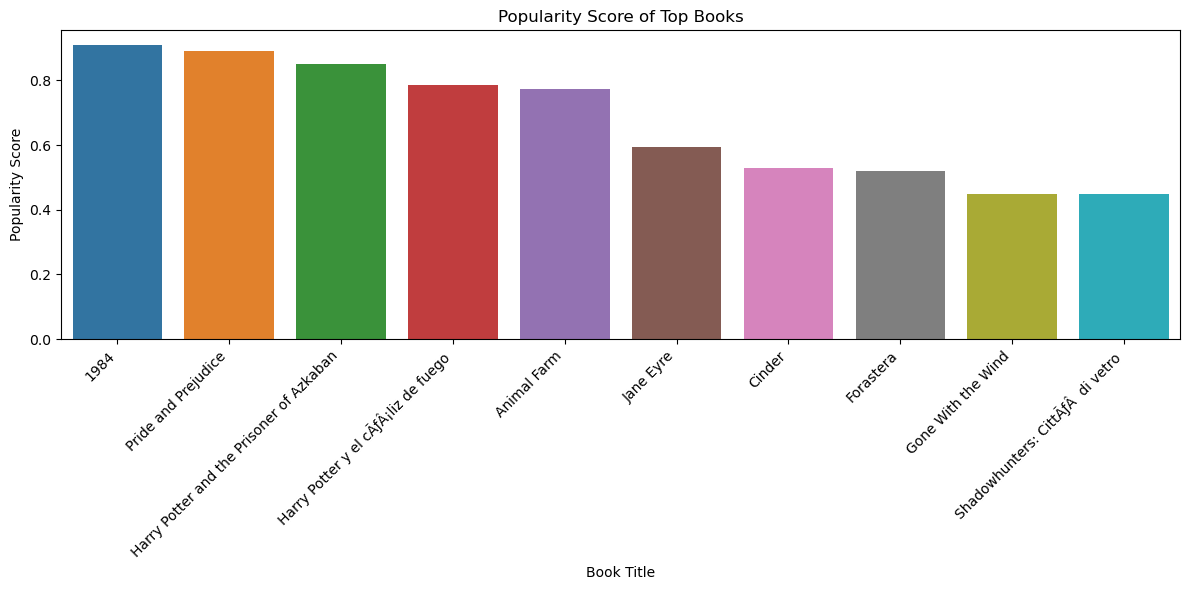

In [36]:
# Plot recommendations
model.plot_recommendations()

# Content Based Recommender System

In this section, we will implement a content-based recommender system that uses the TF-IDF vectorizer to recommend books based on genre similarity.

C:\Users\Divya\AppData\Local\Temp\ipykernel_9632\142110496.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['genre_and_votes'] = self.data['genre_and_votes'].fillna('')


Recommendations for 'Reliquary':
                 title                                    genre_and_votes  \
11402       Deep South                            Mystery 422, Fiction 87   
11737              Meg  Horror 422, Fiction 271, Thriller 208, Science...   
3108      A Wanted Man  Thriller 586, Fiction 548, Mystery 432, Myster...   
22898   Still bleeding  Thriller 12, Mystery 7, Horror 4, Thriller-Mys...   
10006    The Racketeer  Fiction 945, Mystery 432, Thriller 330, Myster...   
23996  November Mourns        Horror 36, Mystery 6, Fiction 6, Thriller 5   
2021     The Passenger  Mystery 422, Fiction 389, Thriller 355, Thrill...   
9489        The Mentor  Fiction 6, Suspense 6, Thriller 5, Horror 4, M...   
27373   The Water Wolf  Fantasy-Paranormal 4, Horror 3, Mystery 2, Thr...   
9824        Do Not Ask                   Fiction 4, Mystery 3, Thriller 2   

       average_rating  
11402            3.93  
11737            3.75  
3108             4.02  
22898            3.63  

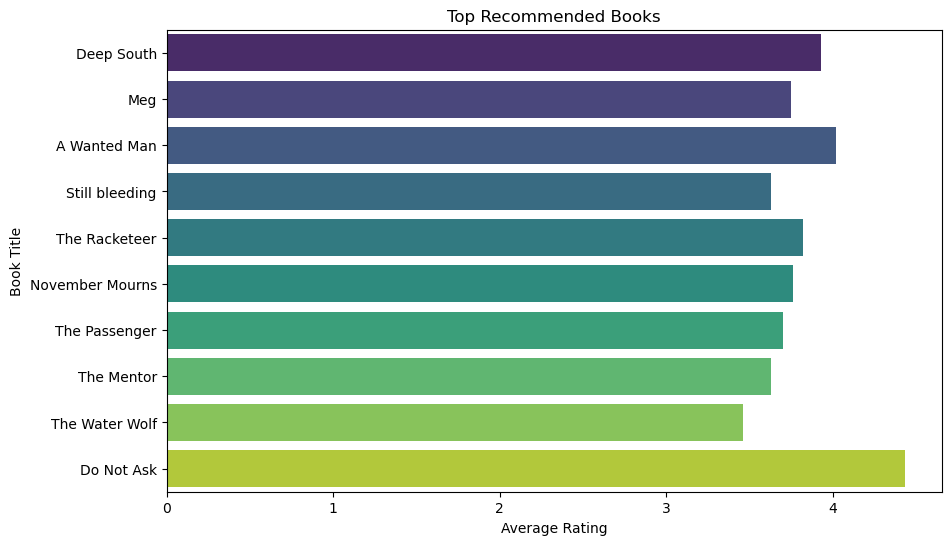

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.sparse as sp

class content_based_recommender_model():
    def __init__(self, data):
        self.data = data
        self.tfidf_matrix = None

    def fit(self):
        # Use TF-IDF Vectorizer to convert text data into vectors
        tfidf = TfidfVectorizer(stop_words='english')
        self.data['genre_and_votes'] = self.data['genre_and_votes'].fillna('')
        self.tfidf_matrix = tfidf.fit_transform(self.data['genre_and_votes'])

    def recommend(self, title, n=10):
        # Check if the title exists in the dataset
        if title not in self.data['title'].values:
            print(f"Title '{title}' not found in the dataset.")
            return pd.DataFrame()

        # Get the index of the book that matches the title
        idx = self.data[self.data['title'] == title].index[0]

        # Compute cosine similarities on-the-fly
        cosine_similarities = cosine_similarity(self.tfidf_matrix[idx], self.tfidf_matrix).flatten()

        # Get the pairwise similarity scores of all books with that book
        sim_scores = list(enumerate(cosine_similarities))

        # Sort the books based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the n most similar books
        sim_scores = sim_scores[1:n+1]

        # Get the book indices
        book_indices = [i[0] for i in sim_scores]

        # Return the top n most similar books
        return self.data.iloc[book_indices][['title', 'genre_and_votes', 'average_rating']]

    def plot_recommendations(self, recommendations):
        plt.figure(figsize=(10, 6))
        sns.barplot(x='average_rating', y='title', data=recommendations, palette='viridis')
        plt.xlabel('Average Rating')
        plt.ylabel('Book Title')
        plt.title('Top Recommended Books')
        plt.show()

# Assuming 'data' is already loaded
# Create an instance of the model
model = content_based_recommender_model(data)

# Fit the model
model.fit()

# Get recommendations
title_to_recommend = 'Reliquary'  # Replace with an actual book title from your data
recommendations = model.recommend(title_to_recommend, n=10)
if not recommendations.empty:
    print(f"Recommendations for '{title_to_recommend}':")
    print(recommendations)

    # Plot recommendations
    model.plot_recommendations(recommendations)
else:
    print("No recommendations to display.")


# Genre Based Recommendation System

In [38]:
# Function to parse 'genre_and_votes' column
def parse_genre_votes(genre_votes_str):
    genre_votes = genre_votes_str.split(', ')
    genre_dict = {}
    for item in genre_votes:
        genre, votes = item.rsplit(' ', 1)
        genre_dict[genre] = int(votes)
    return genre_dict

# Apply the function to create a 'genres' column
data['genre_dict'] = data['genre_and_votes'].apply(parse_genre_votes)

# Extract the list of genres
data['genres'] = data['genre_dict'].apply(lambda x: list(x.keys()))

# Function to recommend books by genre
def recommend_books_by_genre(data, genre, top_n=3):
    # Filter books by the specified genre
    genre_books = data[data['genres'].apply(lambda x: genre in x)]
    
    # Sort by rating count to get the most popular books
    top_books = genre_books.sort_values(by='rating_count', ascending=False).head(top_n)
    
    # Extract relevant information for recommendation
    recommendations = top_books[['title', 'author', 'average_rating', 'rating_count', 'link','genres']]
    
    return recommendations

# Example usage
print(recommend_books_by_genre(data, "Fantasy"))



                                          title  \
14666                                      1984   
18164  Harry Potter and the Prisoner of Azkaban   
10290                               Animal Farm   

                                              author  average_rating  \
14666                     George Orwell, Erich Fromm            4.18   
18164  J.K. Rowling, Jonny Duddle, Tomislav TomiÃ„Â‡            4.57   
10290   George Orwell, Boris Grabnar, Peter Ã…Â kerl            3.94   

       rating_count                                               link  \
14666       3019748     https://www.goodreads.com//book/show/5470.1984   
18164       2702326  https://www.goodreads.com//book/show/22037424-...   
10290       2648255  https://www.goodreads.com//book/show/7613.Anim...   

                                                  genres  
14666  [Classics, Fiction, Science Fiction, Science F...  
18164  [Fantasy, Young Adult, Fiction, Fantasy-Magic,...  
10290  [Classics, Fiction, Scien

C:\Users\Divya\AppData\Local\Temp\ipykernel_9632\286067370.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genre_dict'] = data['genre_and_votes'].apply(parse_genre_votes)
C:\Users\Divya\AppData\Local\Temp\ipykernel_9632\286067370.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['genres'] = data['genre_dict'].apply(lambda x: list(x.keys()))


# Award Based Recommendation System

In [39]:
# Function to recommend books, prioritizing those with awards and selecting top 10 with highest rating count and highest average ratings
def recommend_books(data):
    # Separate books with and without awards
    books_with_awards = data[data['awards'].notnull() & (data['awards'] != "")]
    books_without_awards = data[data['awards'].isnull() | (data['awards'] == "")]
    
    # Sort books with awards by rating count and average rating
    sorted_books_with_awards = books_with_awards.sort_values(by=['rating_count', 'average_rating'], ascending=[False, False])
    
    # Sort books without awards by rating count and average rating
    sorted_books_without_awards = books_without_awards.sort_values(by=['rating_count', 'average_rating'], ascending=[False, False])
    
    # Select top 10 books with highest rating count and highest average ratings, prioritizing those with awards
    top_books = pd.concat([sorted_books_with_awards.head(10), sorted_books_without_awards.head(10)])
    top_books = top_books.drop_duplicates(subset=['title'], keep='first').head(10)
    
    # Extract relevant information for recommendation
    recommendations = top_books[['title', 'author', 'average_rating', 'rating_count', 'link', 'awards']]
    
    return recommendations

# Example usage
print(recommend_books(data))


                                          title  \
14666                                      1984   
18164  Harry Potter and the Prisoner of Azkaban   
10290                               Animal Farm   
12666       Harry Potter y el cÃƒÂ¡liz de fuego   
14658                        Gone With the Wind   
23675                         The Secret Garden   
10273                                 Forastera   
21785          Shadowhunters: CittÃƒÂ  di vetro   
18160                    Cem Anos de SolidÃƒÂ£o   
12200                   Cien aÃƒÂ±os de soledad   

                                                  author  average_rating  \
14666                         George Orwell, Erich Fromm            4.18   
18164      J.K. Rowling, Jonny Duddle, Tomislav TomiÃ„Â‡            4.57   
10290       George Orwell, Boris Grabnar, Peter Ã…Â kerl            3.94   
12666  J.K. Rowling, Adolfo MuÃƒÂ±oz GarcÃƒÂ­a, Nieve...            4.56   
14658                      Margaret Mitchell, Pat Conroy  